# MNIST Dataset

In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


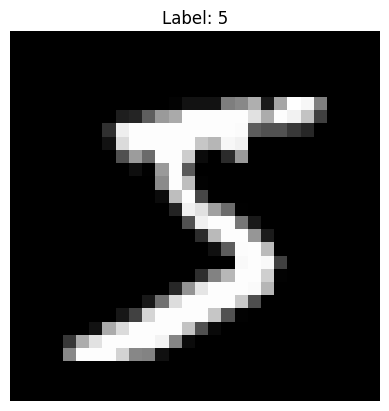

In [16]:
plt.imshow(X.iloc[0].values.reshape(28, 28), cmap='gray')
plt.title(f"Label: {y.iloc[0]}")
plt.axis('off')
plt.show()

In [17]:
y[0]

'5'

In [21]:
y = y.astype(int)
y[0]

np.int64(5)

In [22]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape, y_test.shape)

(60000, 784) (10000,)


# Training a Binary Classifier

In [24]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [46]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=96)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [48]:
x = X.iloc[0]
sgd_clf.predict([x])

/home/samin96/project/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

### Performance Measures

In [42]:
#implementing cross validation

In [49]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = (y_train[train_index] == 5)
  X_test_fold = X_train.iloc[test_index]
  y_test_fold = (y_train_5[test_index])

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.9545
0.96455
0.96615


In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9392 , 0.9678 , 0.95975])

In [51]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def Predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf =Never5Classifier()